In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("duolingo_reviews_cleanwemoji.csv")
df.head()


,content
0,"bug: new updates in-lesson streak ui, green bo..."
1,thing ressetted 90765 day streek.i hate stuipi...
2,what's happened animation validation last upda...
3,please immediately stop speaking lessons under...
4,love app


In [3]:
sia = SentimentIntensityAnalyzer()


In [4]:
def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [5]:
df['sentiment'] = df['content'].apply(get_sentiment)#apply sentiment analysis to the content column 

In [6]:
df['vader_scores'] = df['content'].apply(lambda x: sia.polarity_scores(str(x)))


In [7]:
print(df[['content', 'sentiment', 'vader_scores']].head())

                                             content sentiment  \
0  bug: new updates in-lesson streak ui, green bo...  positive   
1  thing ressetted 90765 day streek.i hate stuipi...  negative   
2  what's happened animation validation last upda...   neutral   
3  please immediately stop speaking lessons under...  negative   
4                                           love app  positive   

                                        vader_scores  
0  {'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...  
1  {'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'comp...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.243, 'neu': 0.62, 'pos': 0.137, 'com...  
4  {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...  


In [8]:
print("\nSentiment values:")
print(df['sentiment'].value_counts())


Sentiment values:
sentiment
positive    1153
neutral      121
negative      93
Name: count, dtype: int64


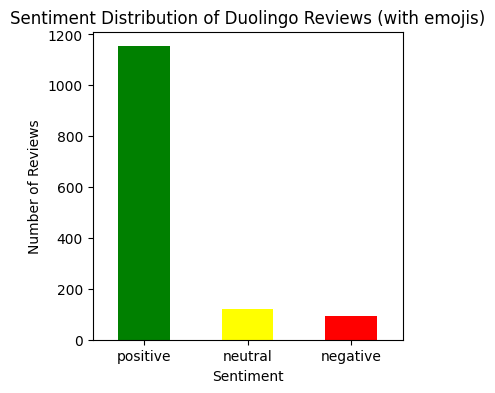

In [9]:
#graphical representation
sentiment_counts = df['sentiment'].value_counts()
colors = {"negative": "red", "neutral": "yellow", "positive": "green"}

plt.figure(figsize=(4,4))
sentiment_counts.plot(kind='bar', color=[colors[s] for s in sentiment_counts.index])
plt.title("Sentiment Distribution of Duolingo Reviews (with emojis)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()